#### Step 1

In [5]:
# Data manipulation and analysis
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

# Train-test split utility
from sklearn.model_selection import train_test_split

# Linear Regression model
from sklearn.linear_model import LinearRegression

In [6]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


#### Step 2

In [7]:
from kagglehub import KaggleDatasetAdapter, dataset_load

# Load a DataFrame with a specific version of the CSV
df = dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "himanshunakrani/student-study-hours",
    "score.csv",
)

# Show the first 5 rows to verify the data
df.head()

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 187/187 [00:00<00:00, 329kB/s]


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Step 3

##### 3.1

In [9]:
# Define feature (X) and target (y)
X = df[['Hours']]   # Using double brackets to keep X as a DataFrame (2D)
y = df['Scores']    # Target variable as a Series (1D)

# Check the first few rows of X and y
print("X sample:")
print(X.head())

print("\ny sample:")
print(y.head())


X sample:
   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5

y sample:
0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64


##### 3.2

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20, 1)
X_test shape: (5, 1)
y_train shape: (20,)
y_test shape: (5,)


#### Step 4

In [11]:
# Create a Linear Regression model instance
model = LinearRegression()

# Train (fit) the model using the training data
model.fit(X_train, y_train)

# Print the model coefficients for inspection
print("Model Coefficient (slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)


Model Coefficient (slope): 9.682078154455697
Model Intercept: 2.826892353899737


#### Step 5

In [12]:
# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)

# Print the predicted values
print("Predicted Scores:", predictions)

# Print the actual test values for comparison
print("Actual Scores:", y_test.values)

Predicted Scores: [83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]
Actual Scores: [81 30 21 76 62]


#### Step 6

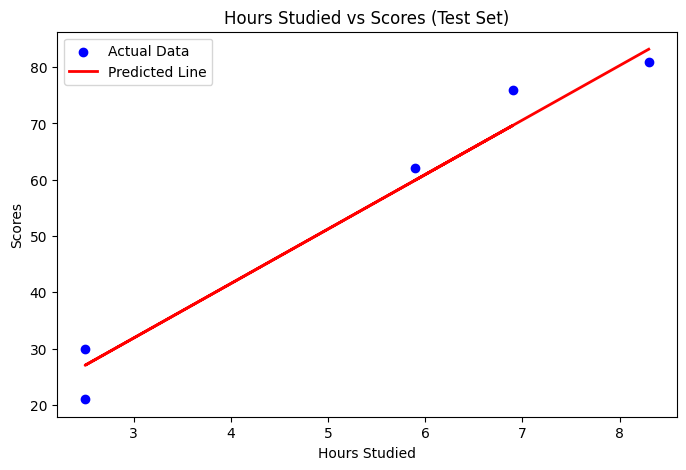

In [13]:
# Create a new figure for visualization
plt.figure(figsize=(8, 5))

# Scatter plot of actual test data (X_test vs y_test)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line (X_test vs predictions)
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted Line')

# Add title and axis labels
plt.title("Hours Studied vs Scores (Test Set)")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")

# Add a legend to differentiate actual vs predicted
plt.legend()

# Show the plot
plt.show()


#### Bonus Step

In [16]:
# Predict the score for a student who studied 5.5 hours
new_prediction = model.predict([[5.5]])

# Print the predicted score
print(f"Predicted score for 5.5 study hours: {new_prediction[0]:.2f}")

Predicted score for 5.5 study hours: 56.08


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
